<p style="text-align: center;" ><font size="+3"><u><b>Laboratory 3 Part 1: Linear systems theory applied to optical imaging systems</u></b></p>

<p style="text-align: left;" ><font size="+1"><b>Objectives</b></p>

<div class="alert alert-block alert-warning">
<font color=black>

- Understand linear system analysis in 1D and 2D, be able to perform convolution, cross correlation, and autocorrelation in Python
- Basic optical imaging system modeling
- Simulate an optical system with a perfect lens in Python
- Measure the point spread function of your microscope

</font> 
</div>

<p style="text-align: left;" ><font size="+1"><b>Introduction / Basic Rules</b></p>

<div class="alert alert-block alert-warning">
<font color='black'>

We have revised linear systems in 1D and extended the analysis to 2D signals. In this lab, you will first perform convolution exercises in Python. <br/>
We will then write a simulator for a perfect optical system in Python and see how the PSF of your microscope affects the final image output. </font> 
</div>

# Convolution in Python

<div class="alert alert-block alert-success">
<font color='black'>

1. If you have a signal $f$ that is on $N_f \times M_f$, and a signal $g$ that is $N_g \times M_g$, what is the size of ($f * g$)?
</font> 
</div>

When you linearly convolve two signals of size $N_f \times M_f$ and $N_g \times M_g$, the output size becomes $(N_f + N_g - 1) \times (M_f + M_g - 1)$.

This is because convolution slides one signal across the other, expanding the output to include all possible overlaps.


<div class="alert alert-block alert-warning">
<font color='black'>
Convolution in Python can be performed using `convolve` in 1D and `convolve2d` in 2D. To do this, first import the following functions:

`import scipy` <br/>
`from scipy.signal import convolve2d` <br/>
    
    
By default, `convolve2d` returns the full size of the convolution results. <br/> For many applications, we want to keep the size of the output the same as one of the signals. The following would give an output that is the same size as $f$: <br/>

`convolve2d(f, g, 'same')`<br/>

Now let’s perform some convolutions and try to interpret the results.<br/>
Load the image we provided, `SanFrancisco.npy`, into Python. <br/>
Show the image below. Assume each pixel is 1mm by 1mm. 

</font> 
</div>

<div class="alert alert-block alert-success">
<font color='black'>

2. Now let’s perform some convolutions and try to interpret the results.<br/>
Load the image we provided, `SanFrancisco.npy`, into Python. <br/>
Show the image below. Assume each pixel is 1mm by 1mm. 

</font> 
</div>

In [2]:
import os
os.getcwd()
import scipy
from scipy.signal import convolve2d

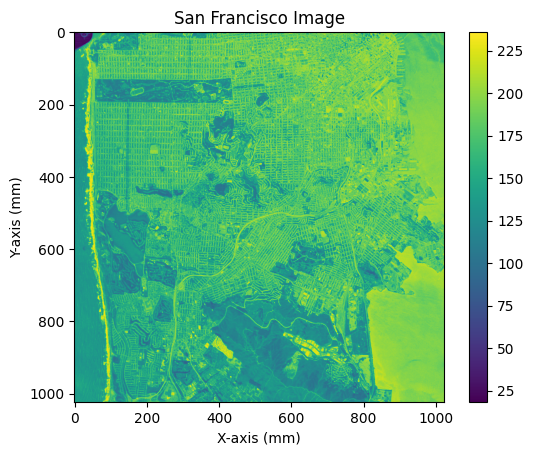

Shape: (1023, 1023)
Dtype: float64


In [25]:
import numpy as np
import matplotlib.pyplot as plt

image = np.load('SanFrancisco.npy')
plt.imshow(image)  
plt.title('San Francisco Image')
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')
plt.colorbar()
plt.show()
print("Shape:", image.shape)
print("Dtype:", image.dtype)

<div class="alert alert-block alert-success">
<font color='black'>

3. Make a Gaussian kernel using the code below: <br/>

`from functions import gauss2d` <br/>
`h = gauss2d((52, 52), 3)`

Assume the same pixel spacing (1 mm) as above. Paste the result below:
</font> 
</div>

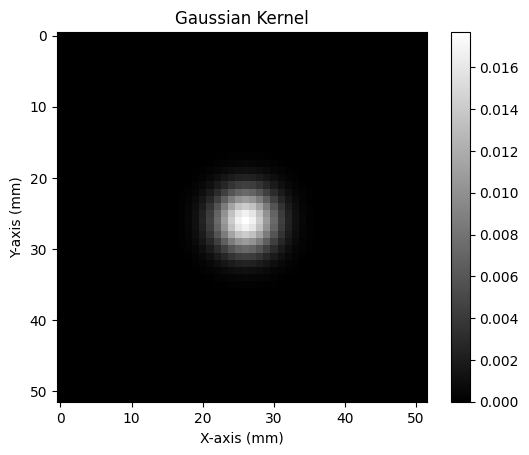

In [ ]:
import numpy as np

# functions.py definition
def gauss2d(shape=(3,3),sigma=0.5):
    if shape[0] % 2 == 0:
        m,n = [ss/2. for ss in shape]
        y,x = np.ogrid[-m:m,-n:n]
    else:
        m,n = [(ss-1.)/2. for ss in shape]
        y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

h = gauss2d((52, 52), 3)
plt.imshow(h, cmap='gray')
plt.title('Gaussian Kernel')
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')
plt.colorbar()
plt.show()



<div class="alert alert-block alert-success">
<font color='black'>

4. If the image is the input to an arbitrary system and `h` is the impulse response of the system, what is the output of the system? <br/> Keep the size of the output the same as the image. Paste your results below. Explain what you see in both the spatial domain and in the frequency domain (i.e., what is the transfer function of the system and how is it affecting the output?)
    
</font> 
</div>

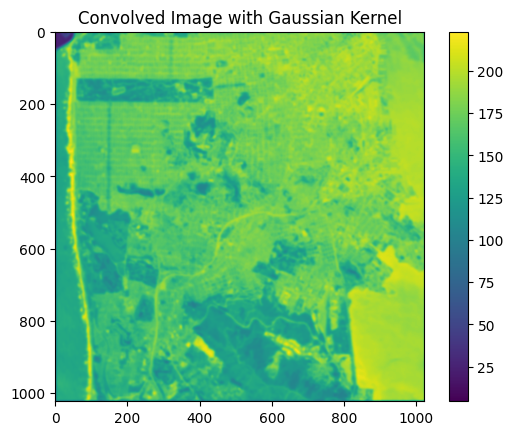

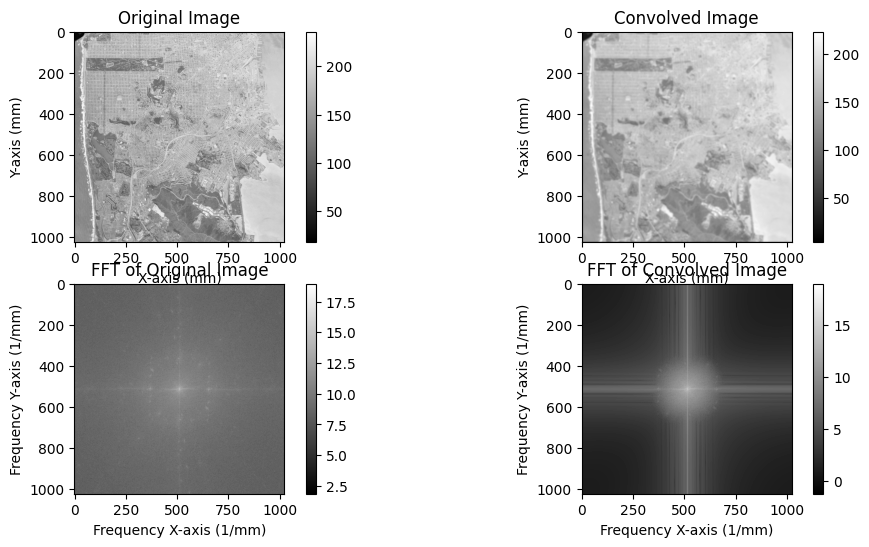

In [27]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift, ifftshift

image = np.load('SanFrancisco.npy')

def gauss2d(shape=(3,3),sigma=0.5):
    if shape[0] % 2 == 0:
        m,n = [ss/2. for ss in shape]
        y,x = np.ogrid[-m:m,-n:n]
    else:
        m,n = [(ss-1.)/2. for ss in shape]
        y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

h = gauss2d((52, 52), 3)

output_image = convolve2d(image, h, mode='same')
plt.imshow(output_image)
plt.title("Convolved Image with Gaussian Kernel")
plt.colorbar()
plt.show()


# FFT of the image

image_shifted = ifftshift(image)
image_fourier = fft2(image_shifted)
image_fourier_shifted = fftshift(image_fourier)
magnitude_image = np.abs(image_fourier_shifted)
real_image = np.real(image_fourier_shifted)
imag_image = np.imag(image_fourier_shifted)

output_shifted = ifftshift(output_image)
output_fourier = fft2(output_shifted)
output_fourier_shifted = fftshift(output_fourier)
magnitude_output = np.abs(output_fourier_shifted)
real_output = np.real(output_fourier_shifted)
imag_output = np.imag(output_fourier_shifted)

# show both image, output image and their FFT
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')
plt.colorbar()
plt.subplot(2, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title("Convolved Image")
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')
plt.colorbar()
plt.subplot(2, 2, 3)
plt.imshow(np.log(np.abs(image_fourier_shifted)), cmap='gray')
plt.title("FFT of Original Image")
plt.xlabel('Frequency X-axis (1/mm)')
plt.ylabel('Frequency Y-axis (1/mm)')
plt.colorbar()
plt.subplot(2, 2, 4)
plt.imshow(np.log(np.abs(output_fourier_shifted)), cmap='gray')
plt.title("FFT of Convolved Image")
plt.xlabel('Frequency X-axis (1/mm)')
plt.ylabel('Frequency Y-axis (1/mm)')
plt.colorbar()
plt.show()


After convolving the input image with the Gaussian kernel h, the output image appears noticeably smoother and blurrier compared to the original. This is expected because the Gaussian kernel acts as a low-pass filter in the spatial domain, it smooths out local variations by averaging pixel values with their neighbors. As a result, fine details and sharp edges in the image are softened or lost.
In the frequency domain, this effect corresponds to the Gaussian kernel attenuating high-frequency components. The transfer function of the system is the Fourier transform of the Gaussian, which is also a Gaussian (in frequency space). This function allows low-frequency content (broad, gradual changes in intensity) to pass through, while significantly reducing high-frequency content (sharp transitions and noise).
Therefore, the system suppresses detail and sharpness, especially at high spatial frequencies. This matches what we observe in the convolved image: a loss of fine detail and a smoother, more uniform appearance overall.


<div class="alert alert-block alert-success">
<font color='black'>

5. Now try to perform the same convolution in the Fourier domain using the convolution theorem and see if you get the same results back. <br/> Note that you would need to zero pad `h` to the same size as the image. You can achieve this with the `np.pad` function in Python. <br/> Paste your code and your image output below. Is the output (exactly) the same as what you got previously using convolution? Please explain what you see. 
    
</font> 
</div>

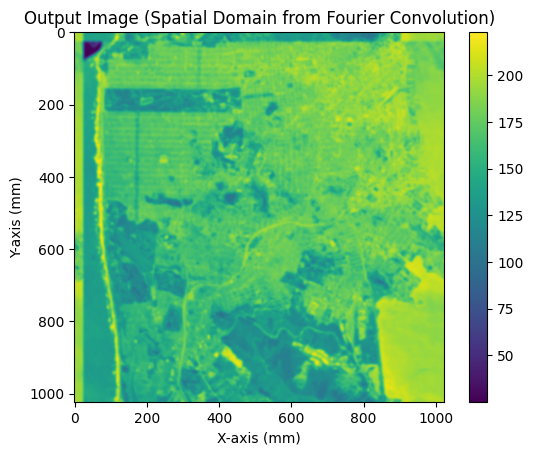

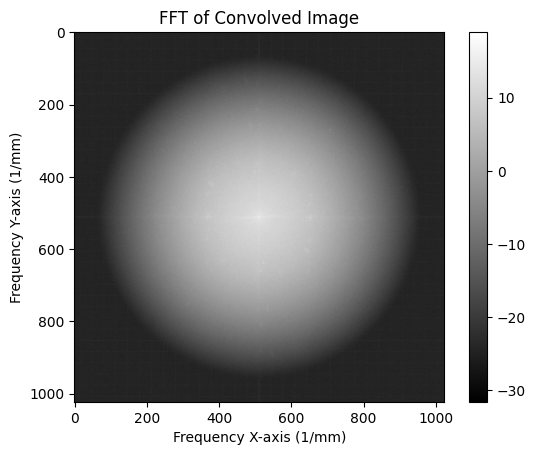

In [107]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift, fftfreq

image = np.load('SanFrancisco.npy')

def gauss2d(shape=(3,3), sigma=0.5):
    if shape[0] % 2 == 0:
        m, n = [ss / 2. for ss in shape]
        y, x = np.ogrid[-m:m, -n:n]
    else:
        m, n = [(ss - 1.) / 2. for ss in shape]
        y, x = np.ogrid[-m:m + 1, -n:n + 1]
    h = np.exp(-(x * x + y * y) / (2. * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create the Gaussian kernel
h = gauss2d((52, 52), 3)
image_shape = image.shape
padded_h = np.pad(h, [(0, image_shape[0] - h.shape[0]), (0, image_shape[1] - h.shape[1])], mode='constant')

image_fft = fft2(image)
h_padded_fft = fft2(padded_h)

output_fft = image_fft * h_padded_fft
output_fourier = np.real(ifft2(output_fft))

convolved_image_fft = fftshift(fft2(output_fourier))
freq_x = fftfreq(image.shape[1])
freq_y = fftfreq(image.shape[0])
freq_x = fftshift(freq_x)
freq_y = fftshift(freq_y)


plt.imshow(output_fourier)
plt.colorbar()
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')
plt.title('Output Image (Spatial Domain from Fourier Convolution)')
plt.show()

plt.imshow(np.log(np.abs(convolved_image_fft)), cmap='gray')
plt.title('FFT of Convolved Image')
plt.xlabel('Frequency X-axis (1/mm)')
plt.ylabel('Frequency Y-axis (1/mm)')
plt.colorbar()
plt.show()

When I performed the convolution in the Fourier domain using the convolution theorem, the result looked very similar to what I got using the spatial domain method with convolve2d(). I first zero-padded the Gaussian kernel to match the image size, then took the FFT of both the image and the padded kernel. After multiplying them in the frequency domain and applying the inverse FFT, I was able to reconstruct the convolved image. Visually, the output shows the same blurring and smoothing effect we saw earlier, which makes sense since both approaches are theoretically equivalent. However, I noticed that the image from the Fourier method appears slightly brighter and a bit different at the edges. This is likely due to the way boundaries are handled — in the spatial method I used 'wrap' mode, which treats the image as if it wraps around, while in the Fourier method the zero-padding effectively assumes the image is surrounded by zeros. These subtle differences in edge handling can lead to small variations in the final result. Overall, though, the Fourier convolution method works as expected and confirms the theory.

<div class="alert alert-block alert-success">
<font color='black'> 
6. Make the following two filters/kernels in Python: <br/>
Perform convolution of each filter with the image. Paste your image below. Explain what you see using both spatial domain and frequency domain descriptions. 
</font> 
</div>

<img src="Lab3\kernel.png" style="width:400px">

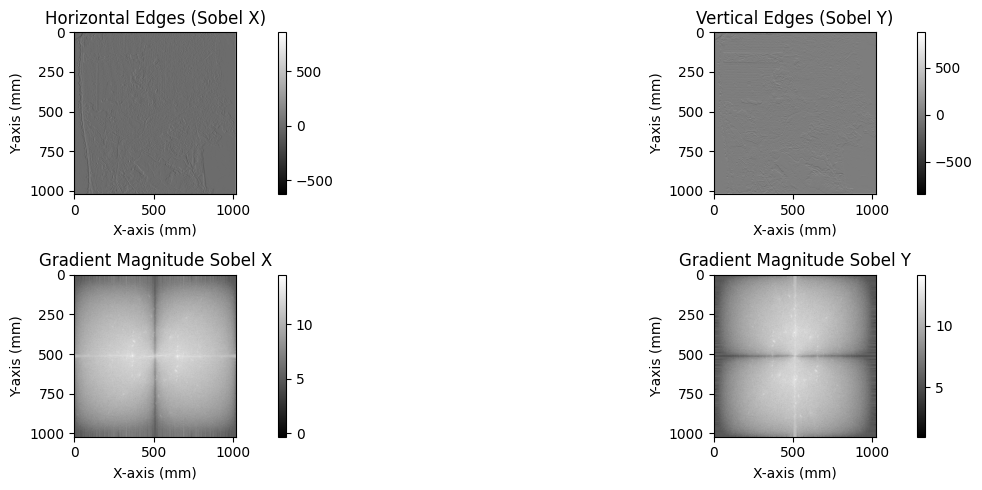

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d


image = np.load('SanFrancisco.npy')
# Sobel filters
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

def fourier_convolve(image, kernel):
    image_shape = image.shape
    kernel_shape = kernel.shape
    padded_kernel = np.pad(kernel, [(0, image_shape[0] - kernel_shape[0]), (0, image_shape[1] - kernel_shape[1])], mode='constant')
    
    image_fft = fft2(image)
    kernel_fft = fft2(padded_kernel)
    
    output_fft = image_fft * kernel_fft
    output_image = np.real(ifft2(output_fft))
    
    return output_image, image

# Convolution
output_x = convolve2d(image, sobel_x, mode='same')
output_y = convolve2d(image, sobel_y, mode='same')

output_x_fourier = fftshift(fft2(ifftshift(output_x)))
output_y_fourier = fftshift(fft2(ifftshift(output_y)))

output_x_logmag = np.log(np.abs(output_x_fourier))
output_y_logmag = np.log(np.abs(output_y_fourier))

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(2, 2, 1)
plt.imshow(output_x, cmap='gray')
plt.title('Horizontal Edges (Sobel X)')
plt.colorbar()
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')


plt.subplot(2, 2, 2)
plt.imshow(output_y, cmap='gray')
plt.title('Vertical Edges (Sobel Y)')
plt.colorbar()
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')

plt.subplot(2, 2, 3)
plt.imshow(output_x_logmag, cmap='gray')
plt.title('Gradient Magnitude Sobel X')
plt.colorbar()
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')

plt.subplot(2, 2, 4)
plt.imshow(output_y_logmag, cmap='gray')
plt.title('Gradient Magnitude Sobel Y')
plt.colorbar()
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')

plt.tight_layout()
plt.show()


To analyze how the image changes under edge detection, I used the two Sobel filters shown in the problem: one for detecting horizontal edges (sobel_x) and one for vertical edges (sobel_y). After convolving each filter with the image, I plotted the results and also computed the overall edge strength using the gradient magnitude.
In the spatial domain, the Sobel filters are designed to highlight intensity changes in specific directions. The horizontal Sobel filter emphasizes vertical edges by detecting changes in the horizontal pixel direction, while the vertical filter highlights horizontal edges. Looking at the resulting images, I can clearly see that each filter enhances features aligned perpendicular to its orientation. The gradient magnitude image combines both filters and gives a clearer picture of all the edges in the image, regardless of direction.
From the frequency domain perspective, these filters act as high-pass filters. They suppress low-frequency (smooth) regions and enhance high-frequency components, which correspond to sudden intensity changes like edges. This is why the output images emphasize borders and transitions while flattening uniform areas.
Overall, this exercise shows how directional filters can isolate specific features in an image and how convolution in the spatial domain relates to filtering behavior in the frequency domain.

# Pupil function and PSF Simulation

<div class="alert alert-block alert-warning">
<font color='black'> In this part of the lab, you will simulate a few pupil functions and compute the corresponding Point Spread Function (PSF) and Optical Transfer Function (OTF). </font> 
</div>

<div class="alert alert-block alert-success">
<font color='black'>

1. Let’s first simulate a circular pupil function [`P(x,y)` in the notes]. <br/> On a 1001 by 1001 grid with a 0.1 mm sampling interval, simulate a centered circular pupil function with 12mm diameter. Paste your result below with axis labels and colorbar.

</font> 
</div>

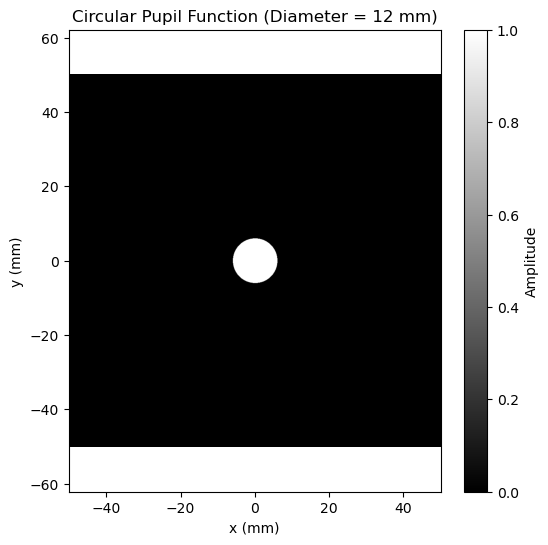

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
grid_size = 1001                 # Size of the grid
sampling_interval = 0.1          # mm
radius = 6                       # Radius in mm (since diameter is 12 mm)

x = np.linspace(-grid_size//2, grid_size//2, grid_size) * sampling_interval
y = np.linspace(-grid_size//2, grid_size//2, grid_size) * sampling_interval
X, Y = np.meshgrid(x, y)

pupil = np.where(X**2 + Y**2 <= radius**2, 1, 0)

# Plot the pupil function
plt.figure(figsize=(6, 6))
plt.imshow(pupil, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Circular Pupil Function (Diameter = 12 mm)")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar(label="Amplitude")
plt.axis('equal')
plt.show()


<div class="alert alert-block alert-success">
<font color='black'>

2. Compute the PSF of the pupil function. We can presume the axes of the pupil function are already scaled to the right imaging plane in this lab, i.e., you can compute the Fourier transform or autocorrelation of the pupil function directly. Paste your code below. Please also include 1) a surface plot of the PSF, 2) a surface plot of the log10 transformed PSF. For both figures, please zoom in on the central 201 by 201 pixels and include axis labels and colorbar. <br/>

You can produce a surface plot using the `ax.plot_surface(X, Y, Z)` function in Python: <br/>
More information about the surface plot can be found here: https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

</font> 
</div>

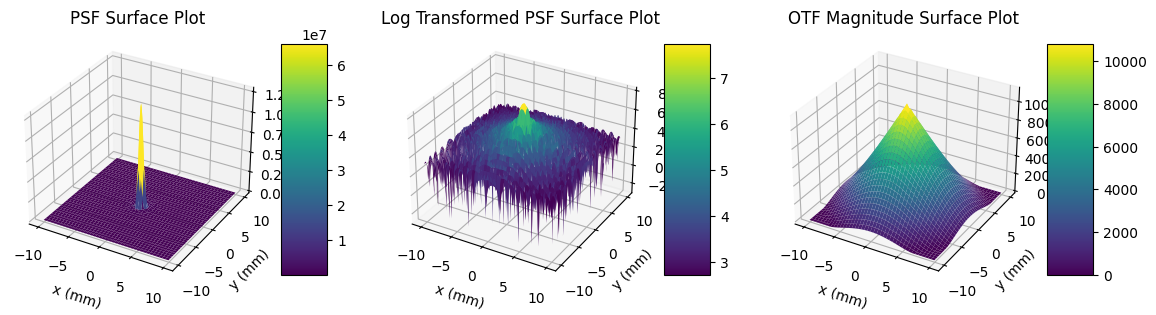

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

grid_size = 1001
sampling_interval = 0.1  # mm
radius = 6  # mm (12 mm diameter)

# Create coordinate grid centered at 0
x = np.linspace(-grid_size//2, grid_size//2, grid_size) * sampling_interval
y = np.linspace(-grid_size//2, grid_size//2, grid_size) * sampling_interval
X, Y = np.meshgrid(x, y)

pupil = np.where(X**2 + Y**2 <= radius**2, 1, 0)

def calculate_psf(image):
    psf = np.abs(np.fft.fftshift(np.fft.fft2(image)))**2
    return psf

psf = calculate_psf(pupil)
log10_psf = np.log10(psf)


center = grid_size // 2
half_window = 100
x_zoom = x[center - half_window:center + half_window + 1]
y_zoom = y[center - half_window:center + half_window + 1]
X_zoom, Y_zoom = np.meshgrid(x_zoom, y_zoom)

otf = np.fft.fftshift(np.fft.ifft2(psf))
otf_magnitude = np.abs(otf)
otf_central = otf_magnitude[center - half_window:center + half_window + 1, center - half_window:center + half_window + 1]

#plot everything
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
surf1 = ax1.plot_surface(X_zoom, Y_zoom, psf[center - half_window:center + half_window + 1, center - half_window:center + half_window + 1], cmap='viridis')
ax1.set_title('PSF Surface Plot')
ax1.set_xlabel('x (mm)')
ax1.set_ylabel('y (mm)')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
surf2 = ax2.plot_surface(X_zoom, Y_zoom, log10_psf[center - half_window:center + half_window + 1, center - half_window:center + half_window + 1], cmap='viridis')
ax2.set_title('Log Transformed PSF Surface Plot')
ax2.set_xlabel('x (mm)')
ax2.set_ylabel('y (mm)')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
surf3 = ax3.plot_surface(X_zoom, Y_zoom, otf_central, cmap='viridis')
ax3.set_title('OTF Magnitude Surface Plot')
ax3.set_xlabel('x (mm)')
ax3.set_ylabel('y (mm)')
fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=5)
plt.show()


<div class="alert alert-block alert-warning">
<font color='black'> 

From the PSF, we can compute the Fourier domain transfer function of the system. This function is called the Optical Transfer Function (OTF), and is equal to the Fourier transform of the PSF normalized by the totally area under the PSF, or equivalently normalized by the DC value (`frequency = [0, 0]`) of the Fourier transform. 
</font> 
</div>

<div class="alert alert-block alert-success">
<font color='black'>

3. Compute the OTF. Past your code below and include both a regular plot (`ax.imshow`) and a surface plot (`ax.plot_surface`) of the OTF below. 
</font> 
</div>

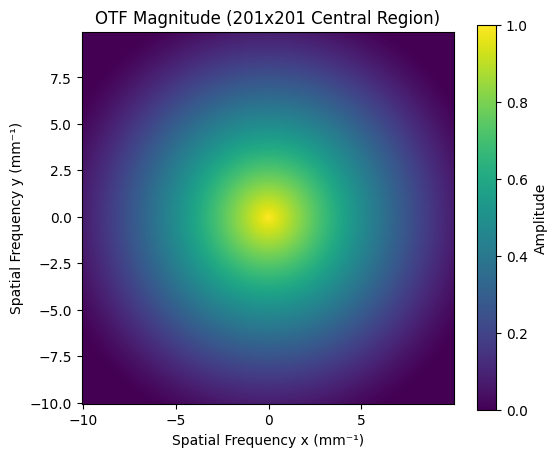

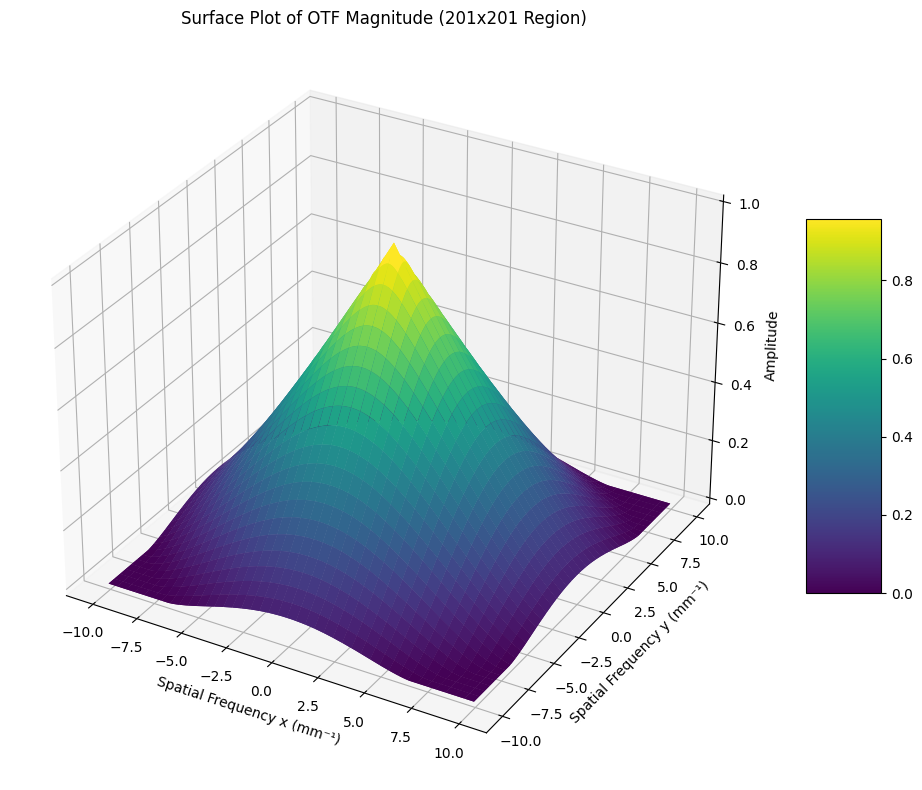

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

grid_size = 1001
sampling_interval = 0.1  # mm
radius = 6  # mm (diameter = 12mm)

x = np.linspace(-grid_size//2, grid_size//2, grid_size) * sampling_interval
y = np.linspace(-grid_size//2, grid_size//2, grid_size) * sampling_interval
X, Y = np.meshgrid(x, y)

pupil = np.where(X**2 + Y**2 <= radius**2, 1, 0)

psf = calculate_psf(pupil)

def calculate_otf(psf):
    F_psf = np.fft.fft2(np.fft.ifftshift(psf))  # undo fftshift before FFT
    dc_value = F_psf[0, 0]  # Total energy in PSF
    otf = F_psf / dc_value  # Normalize OTF
    otf = np.fft.fftshift(otf)  # Shift DC to center
    return otf

otf = calculate_otf(psf)

# Get magnitude for plotting
otf_magnitude = np.abs(otf)

center = grid_size // 2
half_window = 100
x_zoom = x[center - half_window:center + half_window + 1]
y_zoom = y[center - half_window:center + half_window + 1]
X_zoom, Y_zoom = np.meshgrid(x_zoom, y_zoom)
otf_zoom = otf_magnitude[center - half_window:center + half_window + 1,
                         center - half_window:center + half_window + 1]

plt.figure(figsize=(6, 5))
plt.imshow(otf_zoom, extent=[x_zoom[0], x_zoom[-1], y_zoom[0], y_zoom[-1]], cmap='viridis')
plt.title("OTF Magnitude (201x201 Central Region)")
plt.xlabel("Spatial Frequency x (mm⁻¹)")
plt.ylabel("Spatial Frequency y (mm⁻¹)")
plt.colorbar(label="Amplitude")
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_zoom, Y_zoom, otf_zoom, cmap='viridis')
ax.set_title("Surface Plot of OTF Magnitude (201x201 Region)")
ax.set_xlabel("Spatial Frequency x (mm⁻¹)")
ax.set_ylabel("Spatial Frequency y (mm⁻¹)")
ax.set_zlabel("Amplitude")
fig.colorbar(ax.plot_surface(X_zoom, Y_zoom, otf_zoom, cmap='viridis'), ax=ax, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<font color='black'> 

4. Now let’s simulate what an image passing through a system with this pupil function looks like. Make a star pattern by calling the `make_star` function provided in lab 3 course content. You need to provide the axes of your image to the function. Presuming you called your axes variables `x` and `y`, you can make a star pattern with the following code. Please use the same axes as the PSF above, from -50 mm to 50 mm.
    
`from functions import make_star` <br/>
`star = make_star(x, y)`
    
Plot what the star pattern would look like through a system with the PSF and OTF you just calculated. Paste your code and your results below. Explain what you observe.
</font> 
</div>

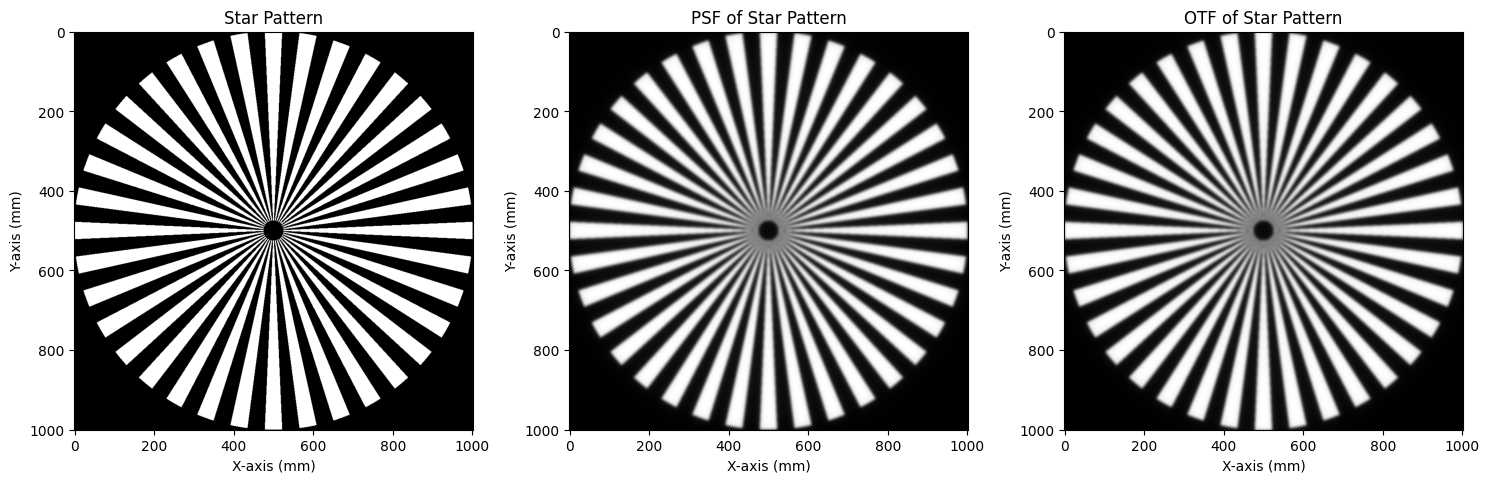

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from scipy.signal import fftconvolve

grid_size = 1001
x = np.linspace(-50, 50, grid_size)
y = np.linspace(-50, 50, grid_size)

def make_star(x, y, stype='bin', cycles=36):
    [X,Y] = np.meshgrid(x, y)
    phy = np.arctan2(Y,X) * cycles  #phase at each pixel
    pint = np.cos(phy)  #relative intensity
    if 'bin' in stype:
        star = np.zeros_like(X, dtype=np.uint8)
        star[pint>=0] = 255
    elif 'sin' in stype:
        star = ((pint+1)*127.5).astype(np.uint8)
    mask1 = (X**2+Y**2) > (x.max()/20)**2
    mask2 = (X**2+Y**2) < (x.max())**2
    star = star.astype(np.double) * mask1.astype(np.double) * mask2.astype(np.double)
    return star/star.max()

# Generate the star pattern
star = make_star(x, y)

output_image_psf = fftconvolve(star, psf, mode='same')

star_fft = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(star)))
output_image_otf = np.real(np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(star_fft * otf_magnitude))))

#show all 3

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(star, cmap='gray')
plt.title('Star Pattern')
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')
plt.subplot(1, 3, 2)
plt.imshow(output_image_psf, cmap='gray')
plt.title('PSF of Star Pattern')
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')
plt.subplot(1, 3, 3)
plt.imshow(output_image_otf, cmap='gray')
plt.title('OTF of Star Pattern')
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')
plt.tight_layout()
plt.show()


To simulate how an image is affected by an optical system, I created a star pattern using the make_star() function and then filtered it using the Optical Transfer Function (OTF) I had previously computed from the system's Point Spread Function (PSF). The star pattern represents a test object with high-frequency content radiating from the center, making it ideal for visualizing how the system handles different spatial frequencies.
After applying the OTF in the frequency domain, the resulting image becomes increasingly blurred. This indicates that all frequency components of the star pattern were attenuated and smoothed out by the system’s transfer function. In other words, the OTF filtered out frequencies on the extremes, leaving a smoothed and low-detail image.

This is also seen in the PSF of the star pattern which is slightly more blurry than the original star pattern.

<div class="alert alert-block alert-success">
<font color='black'>

5. Now let’s the make the aperture smaller. Make a 3mm diameter pupil function. Compute the PSF, OTF, and image output and paste the images below. <br/> What do you see? How does this relate to the observation from the last lab?</font> 
</div>

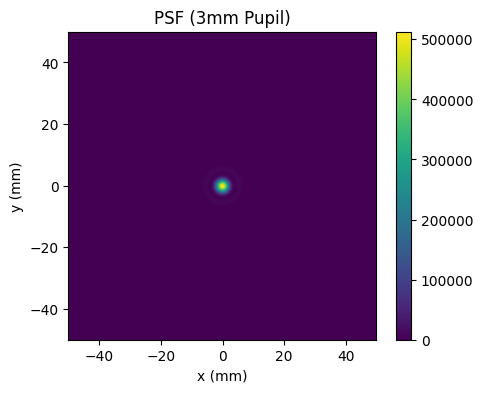

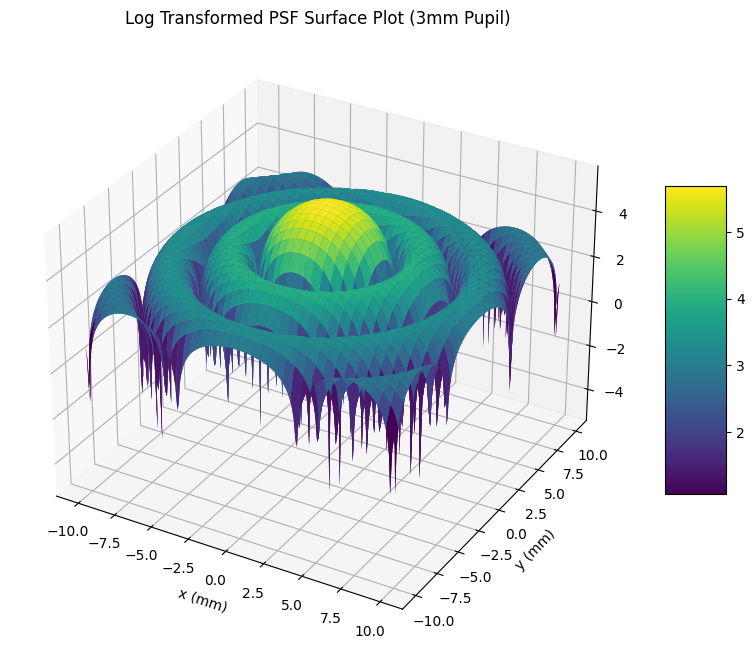

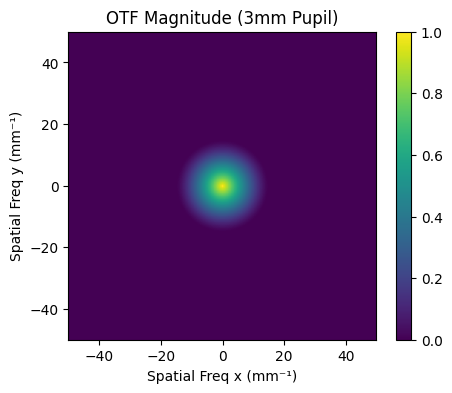

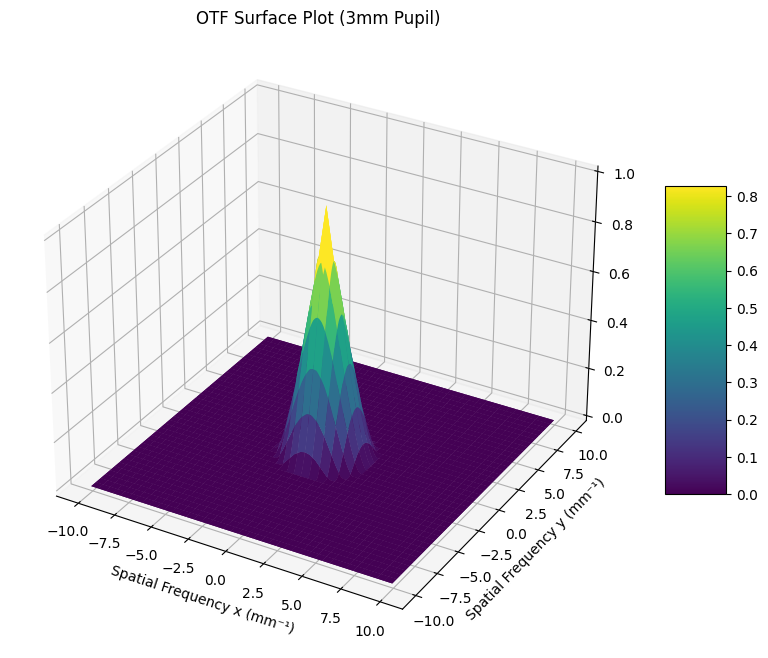

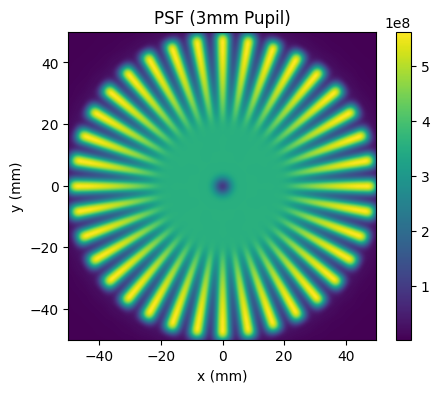

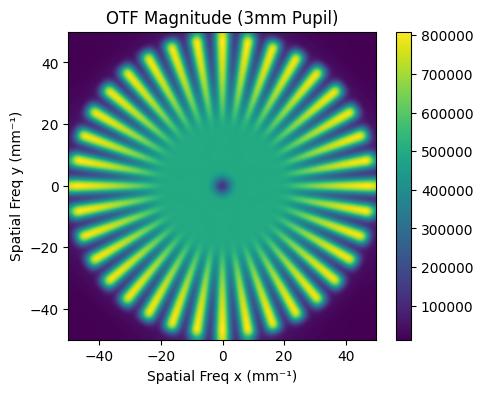

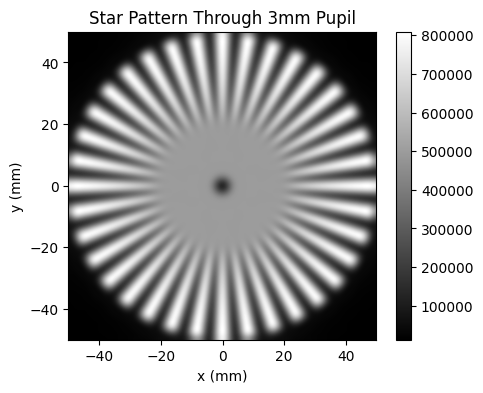

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

grid_size = 1001
sampling_interval = 0.1  # mm
radius = 6  # mm (diameter = 12mm)

x = np.linspace(-grid_size//2, grid_size//2, grid_size) * sampling_interval
y = np.linspace(-grid_size//2, grid_size//2, grid_size) * sampling_interval
X, Y = np.meshgrid(x, y)

pupil = np.where(X**2 + Y**2 <= radius**2, 1, 0)

psf = calculate_psf(pupil)

otf = calculate_otf(psf)

otf_magnitude = np.abs(otf)
otf_magnitude /= otf_magnitude / np.max(otf_magnitude)

center = grid_size // 2
half_window = 100
x_zoom = x[center - half_window:center + half_window + 1]
y_zoom = y[center - half_window:center + half_window + 1]
X_zoom, Y_zoom = np.meshgrid(x_zoom, y_zoom)
otf_zoom = otf_magnitude[center - half_window:center + half_window + 1,
                         center - half_window:center + half_window + 1]

def make_star(x, y, stype='bin', cycles=36):
    Xs, Ys = np.meshgrid(x, y)
    phy = np.arctan2(Ys, Xs) * cycles
    pint = np.cos(phy)
    if 'bin' in stype:
        star = np.zeros_like(Xs, dtype=np.uint8)
        star[pint >= 0] = 255
    elif 'sin' in stype:
        star = ((pint + 1) * 127.5).astype(np.uint8)
    mask1 = (Xs**2 + Ys**2) > (x.max() / 20)**2
    mask2 = (Xs**2 + Ys**2) < (x.max())**2
    star = star.astype(np.double) * mask1.astype(np.double) * mask2.astype(np.double)
    return star / star.max()

star = make_star(x, y)

radius = 1.5  # mm
pupil_small = np.where(X**2 + Y**2 <= radius**2, 1, 0)

psf_small = calculate_psf(pupil_small)
otf_small = calculate_otf(psf_small)
otf_small_magnitude = np.abs(otf_small)

# Filter the star pattern using the OTF
output_image_psf = fftconvolve(star, psf_small, mode='same')

star_fft = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(star)))
output_image_otf = np.real(np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(star_fft * otf_small))))

#zoom
center = grid_size // 2
half_window = 100
x_zoom = x[center - half_window:center + half_window + 1]
y_zoom = y[center - half_window:center + half_window + 1]
X_zoom, Y_zoom = np.meshgrid(x_zoom, y_zoom)
otf_small_zoom = otf_small_magnitude[center - half_window:center + half_window + 1,
                                        center - half_window:center + half_window + 1]



plt.figure(figsize=(5, 4))
plt.imshow(psf_small, extent=[x[0], x[-1], y[0], y[-1]], cmap='viridis')
plt.title("PSF (3mm Pupil)")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()
plt.show()

#3d psf plot

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_zoom, Y_zoom, psf_small[center - half_window:center + half_window + 1, center - half_window:center + half_window + 1], cmap='viridis')
ax.set_title('PSF Surface Plot (3mm Pupil)')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
fig.colorbar(ax.plot_surface(X_zoom, Y_zoom, psf_small[center - half_window:center + half_window + 1, center - half_window:center + half_window + 1], cmap='viridis'), ax=ax, shrink=0.5, aspect=5)
plt.show()

# 3d log psf plot

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_zoom, Y_zoom, np.log10(psf_small[center - half_window:center + half_window + 1, center - half_window:center + half_window + 1]), cmap='viridis')
ax.set_title('Log Transformed PSF Surface Plot (3mm Pupil)')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
fig.colorbar(ax.plot_surface(X_zoom, Y_zoom, np.log10(psf_small[center - half_window:center + half_window + 1, center - half_window:center + half_window + 1]), cmap='viridis'), ax=ax, shrink=0.5, aspect=5)
plt.show()


# OTF
plt.figure(figsize=(5, 4))
plt.imshow(otf_small_zoom, extent=[x[0], x[-1], y[0], y[-1]], cmap='viridis')
plt.title("OTF Magnitude (3mm Pupil)")
plt.xlabel("Spatial Freq x (mm⁻¹)")
plt.ylabel("Spatial Freq y (mm⁻¹)")
plt.colorbar()
plt.show()

#surface plot for otf
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_zoom, Y_zoom, otf_small_zoom, cmap='viridis')
ax.set_title('OTF Surface Plot (3mm Pupil)')
ax.set_xlabel('Spatial Frequency x (mm⁻¹)')
ax.set_ylabel('Spatial Frequency y (mm⁻¹)')
fig.colorbar(ax.plot_surface(X_zoom, Y_zoom, otf_small_zoom, cmap='viridis'), ax=ax, shrink=0.5, aspect=5)
plt.show()


plt.figure(figsize=(5, 4))
plt.imshow(output_image_psf, extent=[x[0], x[-1], y[0], y[-1]], cmap='viridis')
plt.title("PSF (3mm Pupil)")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()
plt.show()

# OTF
plt.figure(figsize=(5, 4))
plt.imshow(output_image_otf, extent=[x[0], x[-1], y[0], y[-1]], cmap='viridis')
plt.title("OTF Magnitude (3mm Pupil)")
plt.xlabel("Spatial Freq x (mm⁻¹)")
plt.ylabel("Spatial Freq y (mm⁻¹)")
plt.colorbar()
plt.show()

# Filtered star image
plt.figure(figsize=(5, 4))
plt.imshow(output_image_otf, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Star Pattern Through 3mm Pupil")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()
plt.show()



To see how a smaller aperture affects the optical system, I simulated a 3mm diameter pupil function and used it to compute the PSF and OTF. As expected, the PSF became much more spread out compared to the larger aperture case, meaning the system’s ability to focus light is reduced. The central peak is less sharp, and the surrounding energy is more dispersed.
In the frequency domain, the OTF magnitude plot clearly shows that the passband has shrunk significantly as it only allows very low spatial frequencies through. Most high-frequency content, which corresponds to fine details in the image, is completely filtered out.
When I applied this OTF to the star pattern image, the result was a more blurred image. As the diameter of the pupil is reduced, the image becomes more and more blurred. This shows that more and more of the frequency components of the star were attenuated, leaving less detail in the output.
This observation is consistent with what we learned in the last lab: smaller apertures cause more diffraction, which limits resolution and cuts off high spatial frequencies. As a result, the optical system behaves like a strong low-pass filter, only preserving the most basic shapes and removing most detail.

<div class="alert alert-block alert-warning">
<font color='black'> 

Of course not all optical systems have circular pupil functions. Now let’s simulate a few other pupil functions and see how they affect the image output. <br/> Construct a pupil function with an annulus and cross shaped obstruction:
</font> 
</div>

<img src="Lab3\Pupil_cross.png" style="width:400px">

<div class="alert alert-block alert-success">
<font color='black'> 

6. You can construct this in Python by making a disc of 12 mm diameter, subtract a disc of 8 mm diameter, and subtract a central vertical band and a central horizontal band of width 4 mm. <br/>
The Matlab logical operations are going to be helpful for this step:

- and: `np.logical_and(A, B)`
- or: `np.logical_or(A, B)`
- not: `np.logical_not(A)`
    
Paste your code and your pupil function below. 
</font> 
</div>

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Grid setup
grid_size = 1001
x = np.linspace(-50, 50, grid_size)
y = np.linspace(-50, 50, grid_size)
X, Y = np.meshgrid(x, y)

outer_radius = 6
pupil_outer = (X**2 + Y**2) <= outer_radius**2

inner_radius = 4
pupil_inner = (X**2 + Y**2) <= inner_radius**2

cross_width = 2  # half of 4 mm
vertical_bar = np.abs(X) <= cross_width
horizontal_bar = np.abs(Y) <= cross_width
cross_obstruction = np.logical_or(vertical_bar, horizontal_bar)

pupil_annulus_cross = np.logical_and(pupil_outer, np.logical_not(pupil_inner))
pupil_annulus_cross = np.logical_and(pupil_annulus_cross, np.logical_not(cross_obstruction))

# Convert to float for plotting
pupil_annulus_cross = pupil_annulus_cross.astype(float)

# Plot the pupil function
plt.figure(figsize=(6, 5))
plt.imshow(pupil_annulus_cross, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Pupil Function: Annulus + Cross Obstruction")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()
plt.show()


<div class="alert alert-block alert-success">
<font color='black'>

7. Compute the PSF, OTF, and final image output of the star pattern. Paste all images below. Interpret the image output. </font> 
</div>

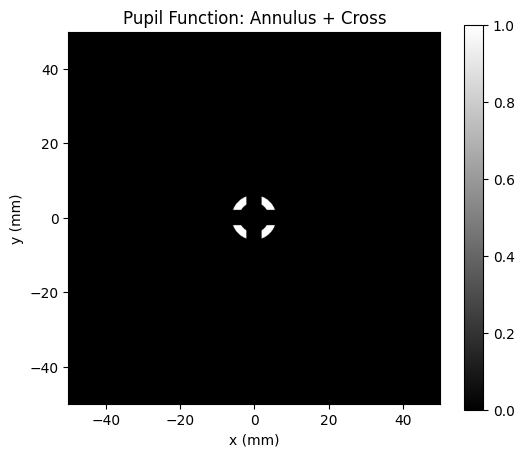

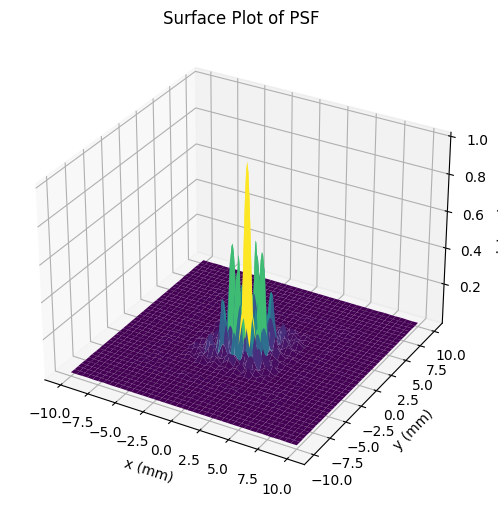

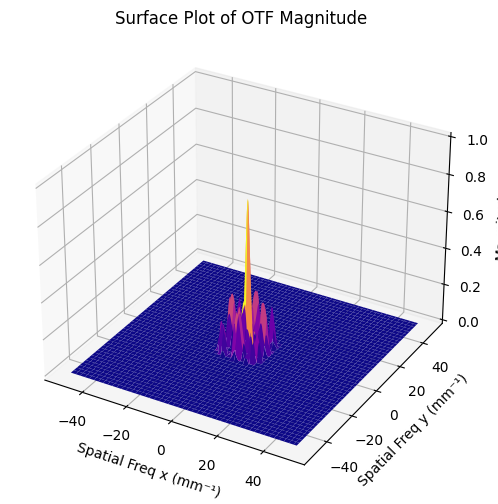

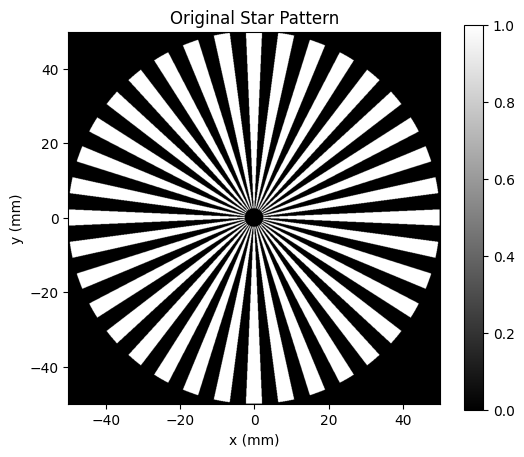

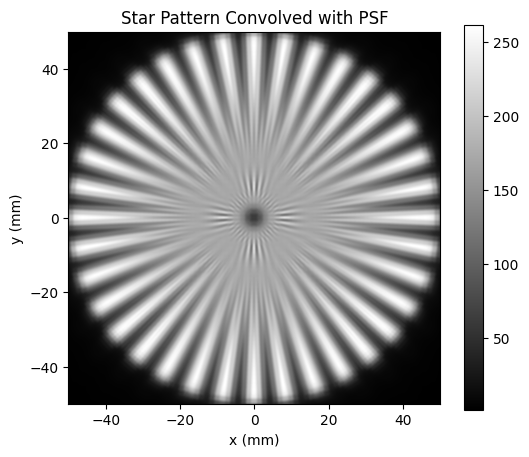

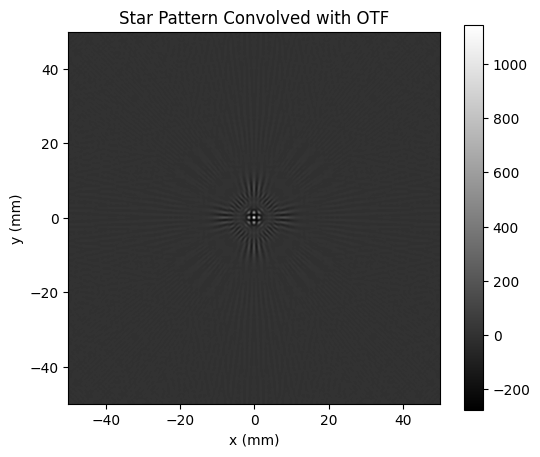

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

grid_size = 1001
x = np.linspace(-50, 50, grid_size)
y = np.linspace(-50, 50, grid_size)
X, Y = np.meshgrid(x, y)

outer_radius = 6  # mm
inner_radius = 4  # mm
cross_width = 2   # mm (half of 4 mm)

pupil_outer = (X**2 + Y**2) <= outer_radius**2
pupil_inner = (X**2 + Y**2) <= inner_radius**2
vertical_bar = np.abs(X) <= cross_width
horizontal_bar = np.abs(Y) <= cross_width
cross_obstruction = np.logical_or(vertical_bar, horizontal_bar)

pupil_annulus_cross = np.logical_and(pupil_outer, np.logical_not(pupil_inner))
pupil_annulus_cross = np.logical_and(pupil_annulus_cross, np.logical_not(cross_obstruction))
pupil = pupil_annulus_cross.astype(float)

plt.figure(figsize=(6,5))
plt.imshow(pupil, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Pupil Function: Annulus + Cross")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()
plt.show()

psf = calculate_psf(pupil)
psf /= psf.max()

# Zoom in (central 201x201 region)
center = grid_size // 2
zoom_psf = psf[center-100:center+101, center-100:center+101]
x_zoom = x[center-100:center+101]
y_zoom = y[center-100:center+101]
X_zoom, Y_zoom = np.meshgrid(x_zoom, y_zoom)

#2d psf

plt.figure(figsize=(6, 5))
plt.imshow(zoom_psf, extent=[x_zoom[0], x_zoom[-1], y_zoom[0], y_zoom[-1]], cmap='viridis')
plt.title("Zoomed PSF (201x201 Region)")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar(label="Intensity")
plt.show()


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_zoom, Y_zoom, zoom_psf, cmap='viridis')
ax.set_title("Surface Plot of PSF")
ax.set_xlabel("x (mm)")
ax.set_ylabel("y (mm)")
ax.set_zlabel("Intensity")
plt.show()

log_psf = np.log10(zoom_psf + 1e-8)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_zoom, Y_zoom, log_psf, cmap='viridis')
ax.set_title("Log10 Surface Plot of PSF")
ax.set_xlabel("x (mm)")
ax.set_ylabel("y (mm)")
ax.set_zlabel("log10(Intensity)")
plt.show()

otf = calculate_otf(psf)
otf_mag = np.abs(otf)

plt.figure(figsize=(6, 5))
plt.imshow(otf_mag, extent=[x[0], x[-1], y[0], y[-1]], cmap='viridis')
plt.title("OTF Magnitude")
plt.xlabel("Spatial Freq x (mm⁻¹)")
plt.ylabel("Spatial Freq y (mm⁻¹)")
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, otf_mag, cmap='plasma')
ax.set_title("Surface Plot of OTF Magnitude")
ax.set_xlabel("Spatial Freq x (mm⁻¹)")
ax.set_ylabel("Spatial Freq y (mm⁻¹)")
ax.set_zlabel("Magnitude")
plt.show()

def make_star(x, y, stype='bin', cycles=36):
    Xs, Ys = np.meshgrid(x, y)
    phy = np.arctan2(Ys, Xs) * cycles
    pint = np.cos(phy)
    if 'bin' in stype:
        star = np.zeros_like(Xs, dtype=np.uint8)
        star[pint >= 0] = 255
    elif 'sin' in stype:
        star = ((pint + 1) * 127.5).astype(np.uint8)
    mask1 = (Xs**2 + Ys**2) > (x.max() / 20)**2
    mask2 = (Xs**2 + Ys**2) < (x.max())**2
    star = star.astype(np.double) * mask1.astype(np.double) * mask2.astype(np.double)
    return star / star.max()

star = make_star(x, y)

plt.figure(figsize=(6, 5))
plt.imshow(star, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Original Star Pattern")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()
plt.show()

# Convolve the star pattern with the PSF
output_image_psf = fftconvolve(star, psf, mode='same')
output_image_otf = np.real(np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(star * otf_mag))))
filtered_star = np.real(np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(star * otf_mag))))


plt.figure(figsize=(6, 5))
plt.imshow(output_image_psf, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Star Pattern Convolved with PSF")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 5))
plt.imshow(filtered_star, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Star Pattern Convolved with OTF")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()
plt.show()



In this step, I simulated an optical system with a more complex pupil function: an annulus (ring) with a cross-shaped obstruction in the center. After computing the PSF and OTF, we observed some interesting behavior. The PSF showed a strong central peak but also had noticeable ripples and interference patterns around it, which were even more apparent in the log-scaled surface plot. This kind of diffraction structure is expected when the pupil function has abrupt spatial features like sharp edges or missing sections (e.g., the cross).
The OTF showed multiple bright lobes arranged in a pattern that reflects the symmetry of the pupil shape. It has a more fragmented frequency response than a simple circular pupil, meaning it transmits certain spatial frequencies while completely blocking others. This selective filtering shows up in the filtered star image — instead of a clean or uniformly blurred version of the star, the output was almost completely flat, with no visible structure remaining. This tells me that the annulus + cross pupil function blocked nearly all frequencies that make up the star’s detail, especially the high frequencies.
Overall, this result highlights how sensitive image quality is to pupil shape. Obstructions like a cross can disrupt the symmetry of the OTF and eliminate important frequency components, which leads to major losses in image clarity.

<div class="alert alert-block alert-success">
<font color='black'>

8. Make the following pupil function in Python. There are two circular apertures of 6mm diameter, each diagonally offset from the origin by 3 mm in the x and y direction.  <br/> Paste your code and your pupil function below. </font> 
</div>

<img src="Lab3\Pupil_6mm.png" style="width:400px">

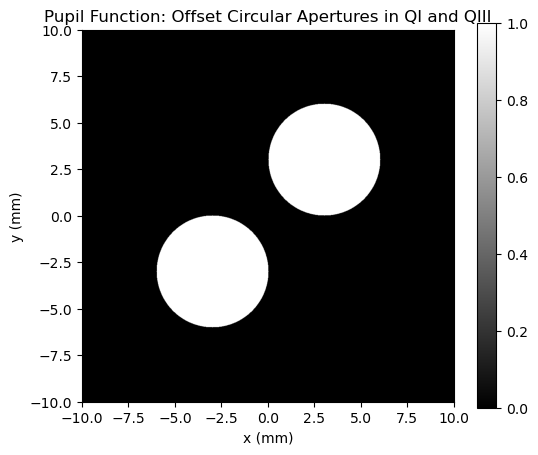

In [53]:
import numpy as np
import matplotlib.pyplot as plt

grid_size = 1001
x = np.linspace(-10, 10, grid_size)
y = np.linspace(-10, 10, grid_size)
X, Y = np.meshgrid(x, y)

# Aperture specs
radius = 3  # mm
offset = 3  # mm

circle_left = (X - offset)**2 + (Y + offset)**2 <= radius**2   # QIII
circle_right = (X + offset)**2 + (Y - offset)**2 <= radius**2  # QI

pupil_two_apertures = np.logical_or(circle_left, circle_right).astype(float)

plt.figure(figsize=(6, 5))
plt.imshow(pupil_two_apertures, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Pupil Function: Offset Circular Apertures in QI and QIII")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()
plt.show()


<div class="alert alert-block alert-success">
<font color='black'>

9. Compute the PSF, OTF, and final image output of the star pattern. Paste all images below. Interpret the image output.  </font> 
</div>

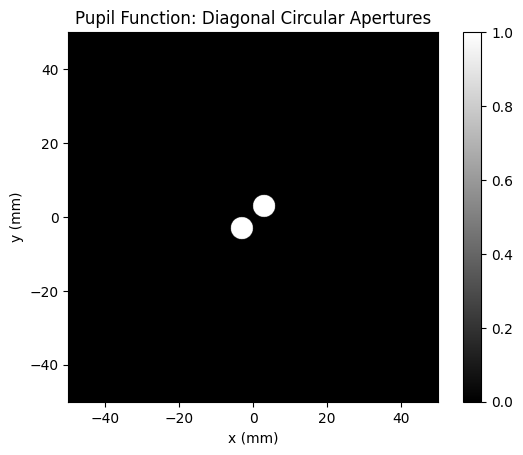

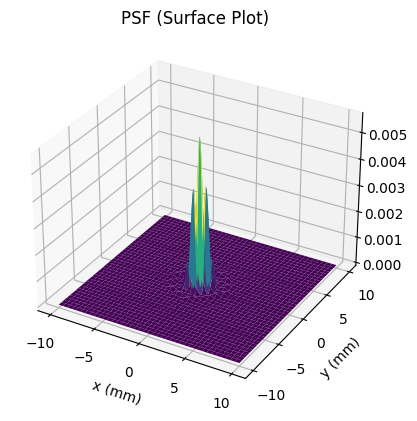

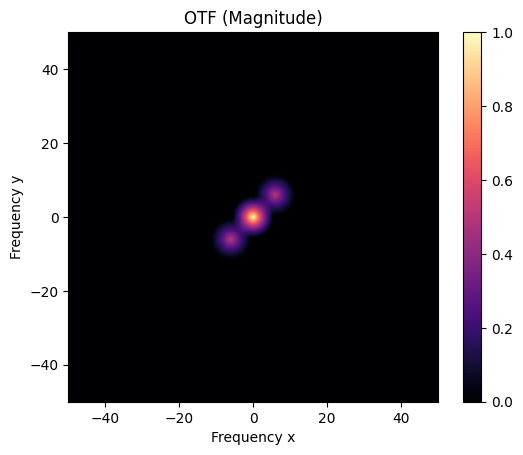

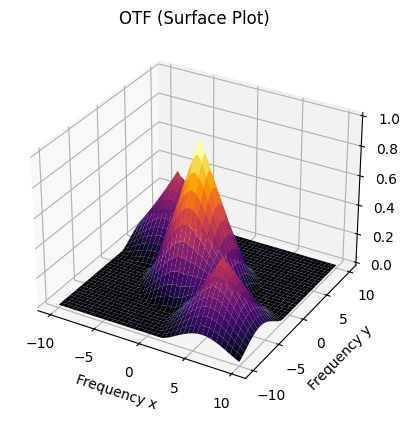

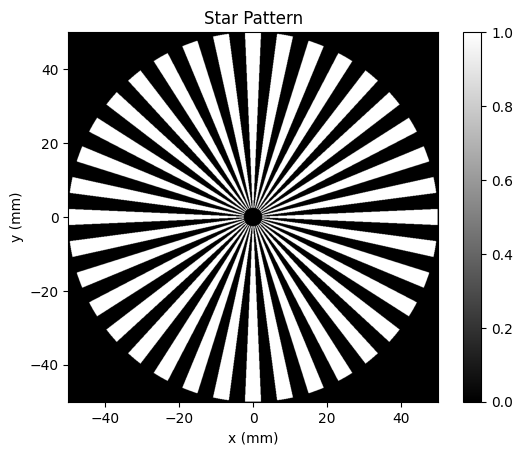

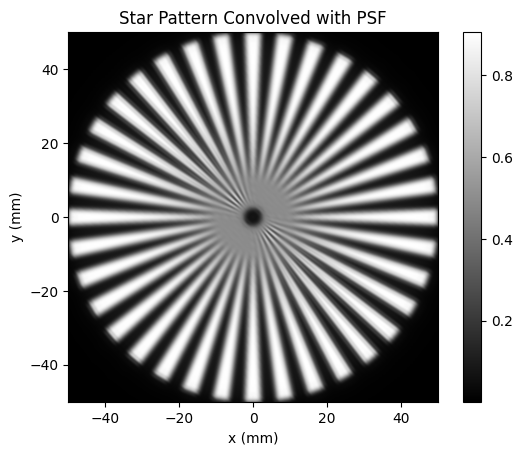

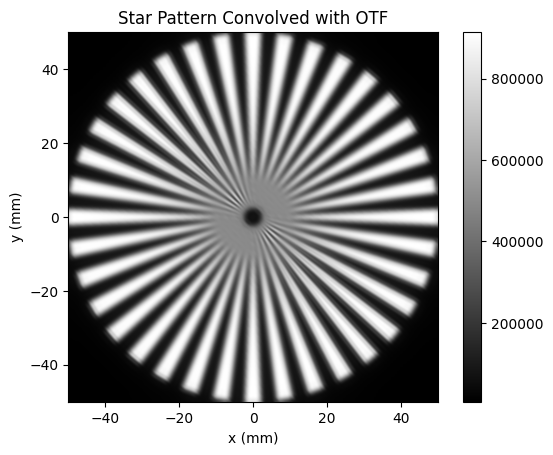

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

grid_size = 1001
x = np.linspace(-50, 50, grid_size)
y = np.linspace(-50, 50, grid_size)
X, Y = np.meshgrid(x, y)

radius = 3  # mm
offset = 3  # mm
circle_left = (X - offset)**2 + (Y + offset)**2 <= radius**2   # QIII
circle_right = (X + offset)**2 + (Y - offset)**2 <= radius**2  # QI
pupil = np.logical_or(circle_left, circle_right).astype(float)

psf = calculate_psf(pupil)
psf /= np.sum(psf)  # normalize PSF

otf = calculate_otf(psf)
otf /= otf[grid_size // 2, grid_size // 2]

def make_star(x, y, stype='bin', cycles=36):
    X, Y = np.meshgrid(x, y)
    phy = np.arctan2(Y, X) * cycles
    pint = np.cos(phy)
    if 'bin' in stype:
        star = np.zeros_like(X, dtype=np.uint8)
        star[pint >= 0] = 255
    elif 'sin' in stype:
        star = ((pint + 1) * 127.5).astype(np.uint8)
    mask1 = (X**2 + Y**2) > (x.max()/20)**2
    mask2 = (X**2 + Y**2) < (x.max())**2
    star = star.astype(np.double) * mask1.astype(np.double) * mask2.astype(np.double)
    return star / star.max()

star = make_star(x, y)

# Convolve star with PSF in frequency domain
F_star = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(star)))
output_image_psf = fftconvolve(star, psf, mode='same')
output_image_otf = np.real(np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(F_star * otf))))

crop = 100
cx, cy = grid_size // 2, grid_size // 2
Xc, Yc = np.meshgrid(x[cx - crop:cx + crop + 1], y[cy - crop:cy + crop + 1])
psf_cropped = psf[cx - crop:cx + crop + 1, cy - crop:cy + crop + 1]
otf_cropped = np.abs(otf)[cx - crop:cx + crop + 1, cy - crop:cy + crop + 1]

# Pupil Function
plt.figure()
plt.imshow(pupil, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Pupil Function: Diagonal Circular Apertures")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()

# PSF 3D Surface Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xc, Yc, psf_cropped, cmap='viridis')
ax.set_title("PSF (Surface Plot)")
ax.set_xlabel("x (mm)")
ax.set_ylabel("y (mm)")

# OTF Magnitude Image
plt.figure()
plt.imshow(np.abs(otf), extent=[x[0], x[-1], y[0], y[-1]], cmap='magma')
plt.title("OTF (Magnitude)")
plt.xlabel("Frequency x")
plt.ylabel("Frequency y")
plt.colorbar()


# OTF Surface Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xc, Yc, otf_cropped, cmap='inferno')
ax.set_title("OTF (Surface Plot)")
ax.set_xlabel("Frequency x")
ax.set_ylabel("Frequency y")

#original star pattern
plt.figure()
plt.imshow(star, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Star Pattern")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()
plt.show()



# output psf
plt.figure()
plt.imshow(output_image_psf, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Star Pattern Convolved with PSF")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(output_image_otf, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Star Pattern Convolved with OTF")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()
plt.show()


For this simulation, we created a pupil function consisting of two circular apertures offset diagonally from the center. This creates an interesting optical effect due to the spatial separation and symmetry of the two openings. After computing the PSF and OTF, we observed that the PSF had multiple fine structures and interference patterns, as shown in the 3D surface plot. The pattern is much more complex than that from a single circular aperture, indicating interference between the two separated wavefronts.
The OTF revealed strong lobes aligned along the diagonal axis, which corresponds to the orientation of the two circular apertures. This directional frequency response means that certain spatial frequencies—particularly along the axis connecting the two circles—are transmitted more strongly than others. In the 2D and 3D OTF magnitude plots, we can clearly see this banded frequency support.
When I applied this OTF to the star pattern, the resulting image showed a very distinct effect. Most of the central features were completely suppressed, while higher-frequency components radiating along the diagonals were preserved. This resulted in a star image with a “crossed-out” dark center and enhanced edge detail along specific directions. The pattern is a direct consequence of the interference and directional filtering introduced by the double-pupil layout.
Overall, this example nicely demonstrates how the geometry of the pupil directly shapes the PSF and OTF, and in turn, how these affect the spatial content and contrast of the final image.
